In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [8]:
train = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/train.csv").drop("~", axis = 1) #경로지정
test = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/test.csv").drop("No", axis = 1)
sample_sub = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/submission.csv")

In [9]:
def preprocessing(data):
    # Lung cancer TNM stage
    #T
    data.loc[(data['M1a'] == 1 ) | (data['M1b'] == 1) | (data['M1c'] == 1), 'M0' ] = 0 
    data.loc[(data['M1a'] == 0) & (data['M1b'] == 0) & (data['M1c'] == 0),'M0'] = 1

    #N
    data.loc[(data['N1'] == 1 ) | (data['N2'] == 1) | (data['N3'] == 1), 'N0'] = 0
    data.loc[(data['N1'] == 0) & (data['N2'] == 0) & (data['N3'] == 0), 'N0'] = 1
    #M
    
    #stage
    data['TNM_stage'] = ''

    stage_map = {

        ('T1', 'N0'): 'IA', ('T1', 'N1'): 'IIA', ('T1', 'N2'): 'IIB', ('T1', 'N3'): 'IIIA', 
        ('T1a', 'N0'): 'IA', ('T1a', 'N1'): 'IIA', ('T1a', 'N2'): 'IIB', ('T1a', 'N3'): 'IIIA',
        ('T1b', 'N0'): 'IA', ('T1b', 'N1'): 'IIA', ('T1b', 'N2'): 'IIB', ('T1b', 'N3'): 'IIIA', 
        ('T1c', 'N0'): 'IA', ('T1c', 'N1'): 'IIA', ('T1c', 'N2'): 'IIB', ('T1c', 'N3'): 'IIIA', 
        ('T2', 'N0'): 'IB', ('T2', 'N1'): 'IIB', ('T2', 'N2'): 'IIIA', ('T2', 'N3'): 'IIIB',
        ('T2a', 'N0'): 'IB', ('T2a', 'N1'): 'IIB', ('T2a', 'N2'): 'IIIA', ('T2a', 'N3'): 'IIIB', 
        ('T2b', 'N0'): 'IIA', ('T2b', 'N1'): 'IIB', ('T2b', 'N2'): 'IIIA', ('T2b', 'N3'): 'IIIB', 
        ('T3', 'N0'): 'IIB', ('T3', 'N1'): 'IIIA', ('T3', 'N2'): 'IIIA', ('T3', 'N3'): 'IIIB',
        ('T4', 'N0'): 'IIIA', ('T4', 'N1'): 'IIIA', ('T4', 'N2'): 'IIIB', ('T4', 'N3'): 'IIIC'
    }

    for t in ['T1', 'T1a', 'T1b', 'T1c', 'T2', 'T2a', 'T2b', 'T3', 'T4']:
        for n in ['N0', 'N1', 'N2', 'N3']:
            mask = (data[t] == 1) & (data[n] == 1)
            target = stage_map.get((t, n), 'Invalid TNM')
            data.loc[mask, 'TNM_stage'] = target
            if target == 'Invalid TNM':
                print((t, n))

    data.loc[data['M1a'] == 1, 'TNM_stage'] = 'IVA'
    data.loc[data['M1b'] == 1, 'TNM_stage'] = 'IVA'
    data.loc[data['M1c'] == 1, 'TNM_stage'] = 'IVB'

    stage_encode = {'' : 0, 'IA' : 1, "IB" : 2, "IIA" : 3, "IIB" : 4 , "IIIA" : 5, "IIIB" : 6, "IIIC": 7, "IVA": 8, "IVB":9}
    stage_encode2 = {0 : 0, 1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}
    data['TNM_stage'] = data['TNM_stage'].map(stage_encode)
    data['TNM_bigstage'] = data['TNM_stage'].map(stage_encode2)
    
    # Surgery
    data['Therapy_count'] = data['Operation'] + data['Chemotherapy'] + data['Radiation Therapy']

    # Other
    data['BMI'] = data['Weight'] / (data['Height'] / 100) ** 2

    # EGFR mutation Detection encoding 99 -> 0
    data['EGFR mutation Detection'] = data['EGFR mutation Detection'].replace(99, 2)

    # Type of Drink encoding 99 -> 0
    data['Type of Drink'] = data['Type of Drink'].replace(99, 0)

    # Mu
    return data

In [10]:
train = preprocessing(train)
test = preprocessing(test)

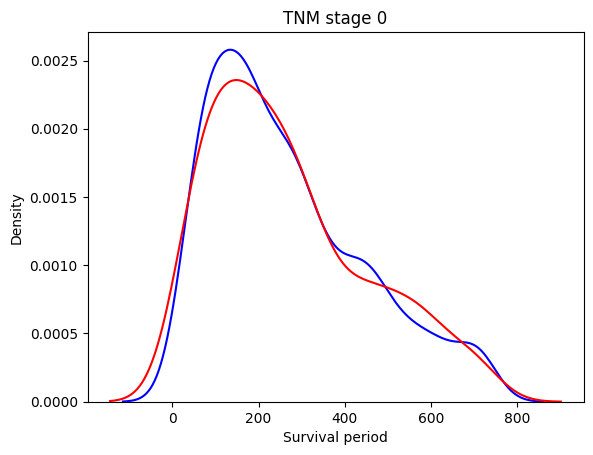

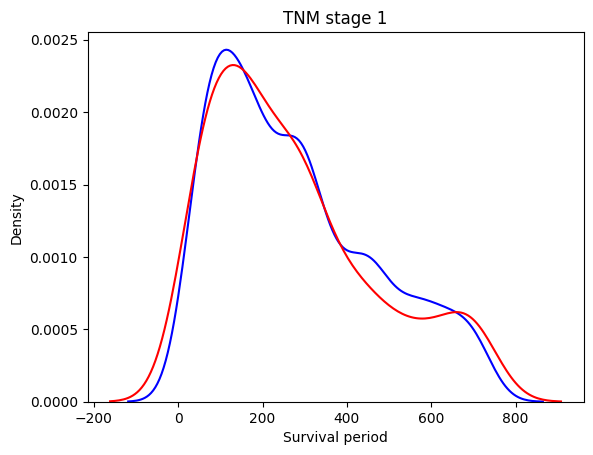

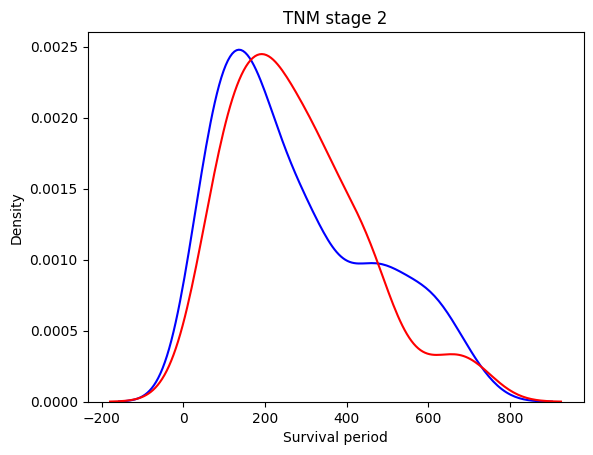

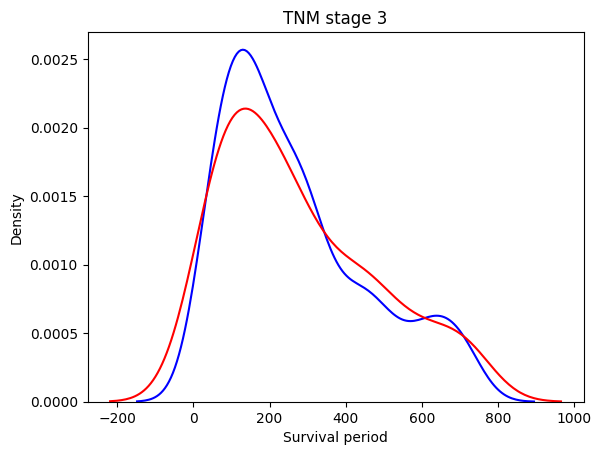

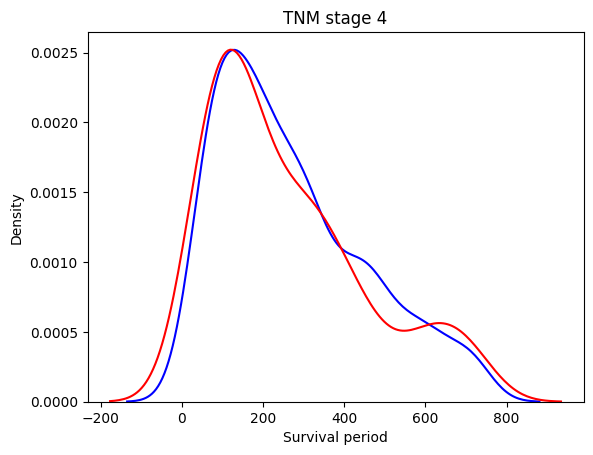

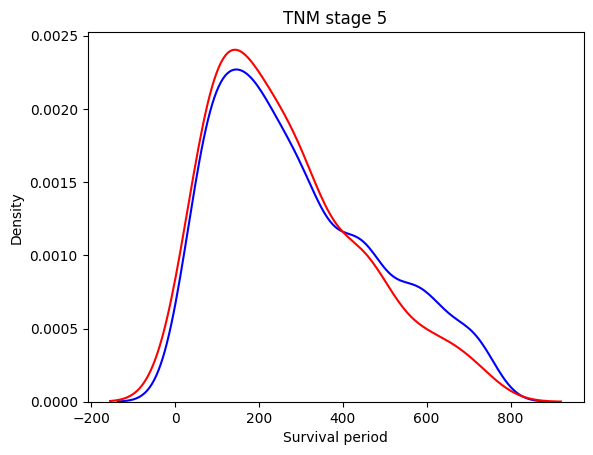

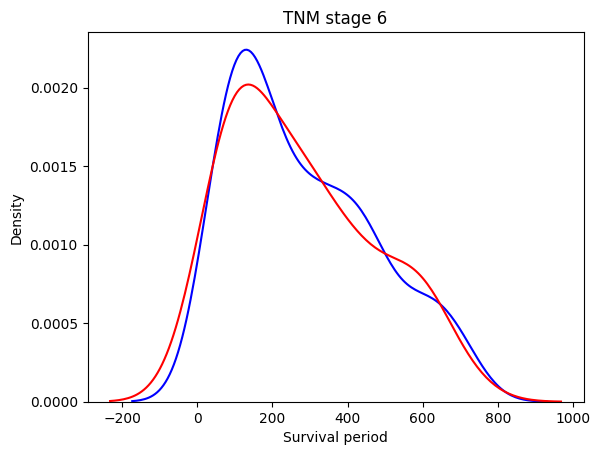

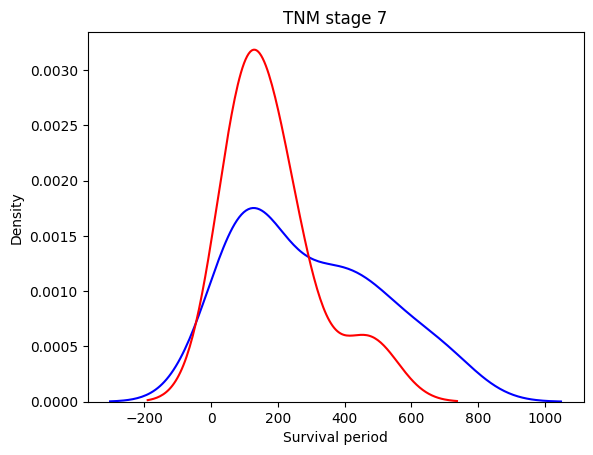

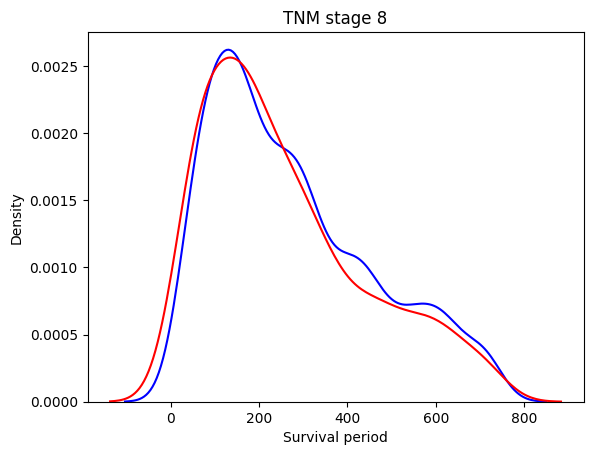

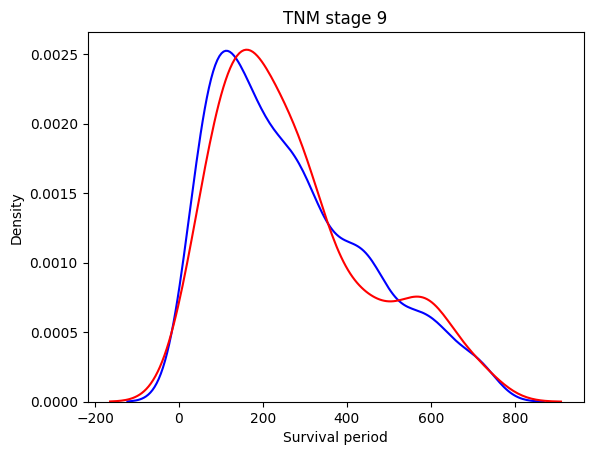

In [11]:
for tnm in sorted(train['TNM_stage'].unique()):
    mask = train['TNM_stage'] == tnm
    data = train[mask]
    # Death 가 0은 파란색, 1은 빨간색으로 survival plot 그리기
    sns.kdeplot(data.loc[data['Death'] == 0, 'Survival period'], color = 'b', label = 'Death 0')
    sns.kdeplot(data.loc[data['Death'] == 1, 'Survival period'], color = 'r', label = 'Death 1')
    plt.title(f"TNM stage {tnm}")
    plt.show()

In [12]:
train.columns

Index(['AGE', 'Adenocarcinoma', 'Large cell carcinoma',
       'Squamous cell carcinoma', 'TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2',
       'T2a', 'T2b', 'T3', 'T4', 'N1', 'N2', 'N3', 'M1a', 'M1b', 'M1c',
       'Type of Drink', 'Smoke', 'Height', 'Weight', 'FEV1_FVC_P', 'DLCO_VA_P',
       'EGFR mutation Detection', 'Operation', 'Chemotherapy',
       'Radiation Therapy', 'Survival period', 'Death', 'M0', 'N0',
       'TNM_stage', 'TNM_bigstage', 'Therapy_count', 'BMI'],
      dtype='object')

In [13]:
train['Adenocarcinoma']

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    1
9998    0
9999    0
Name: Adenocarcinoma, Length: 10000, dtype: int64